#### Load momemta results

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

momemta_out = np.loadtxt('weights_clean.csv', delimiter=",")
benchmarks = momemta_out[0,:]
weights = momemta_out[1:,:]
expected_benchmark_idx = 12
print 'expected benchmark: {}'.format(benchmarks[expected_benchmark_idx])
print benchmarks.shape, weights.shape

expected benchmark: 172.0
(26,) (300, 26)


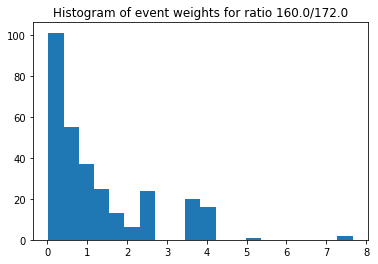

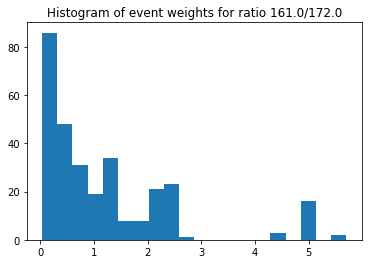

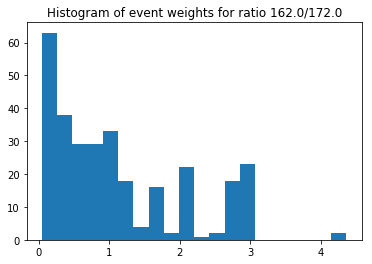

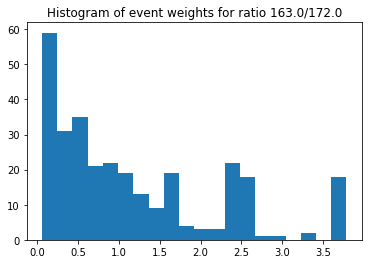

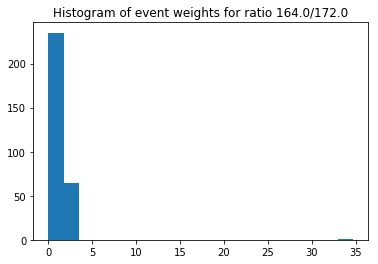

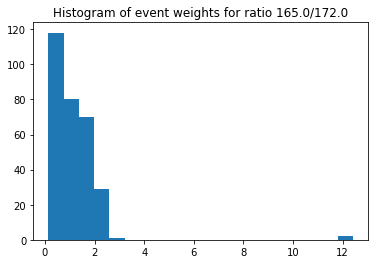

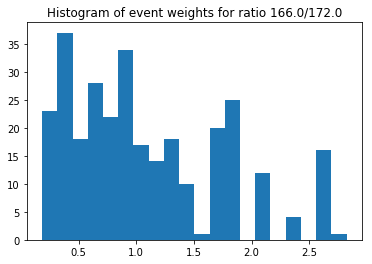

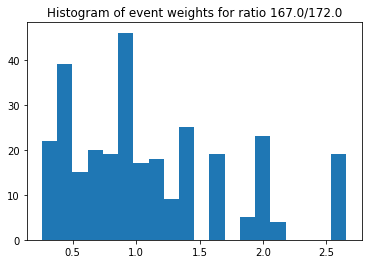

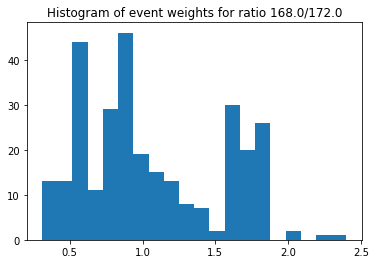

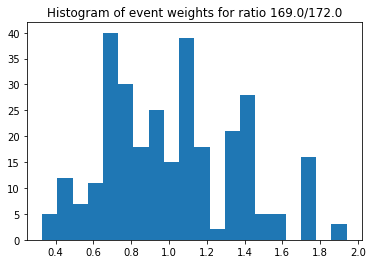

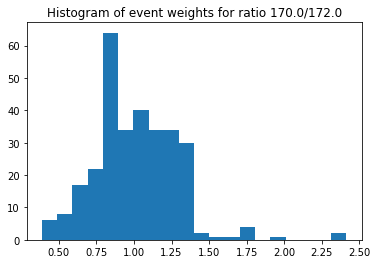

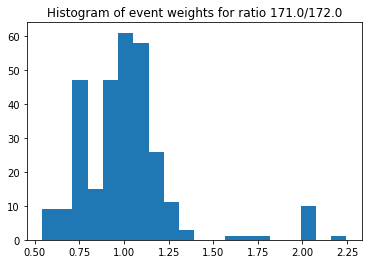

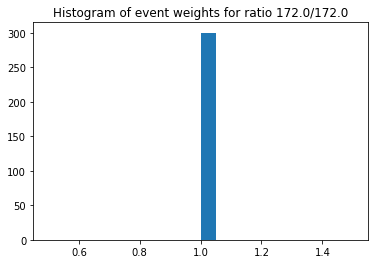

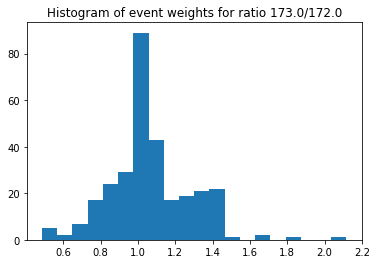

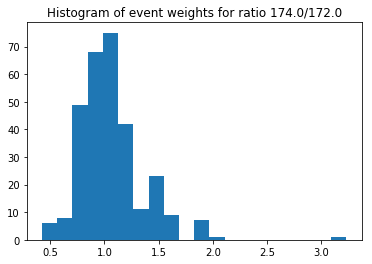

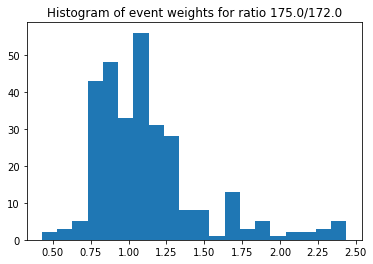

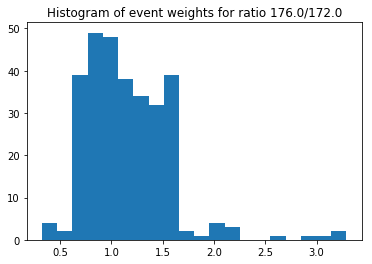

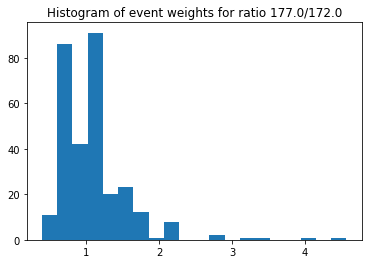

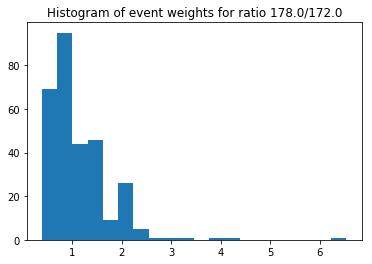

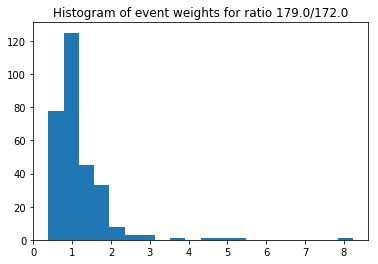

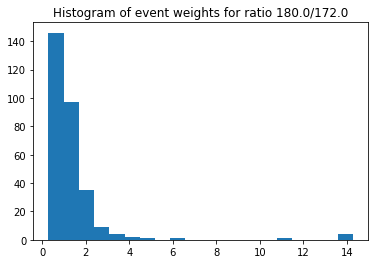

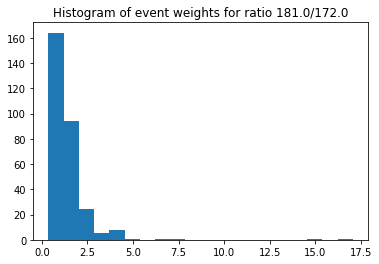

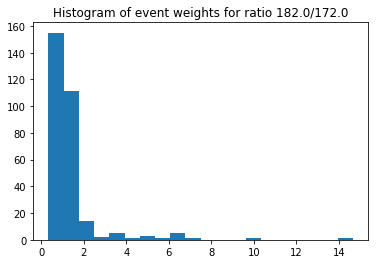

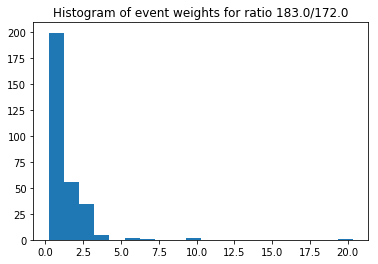

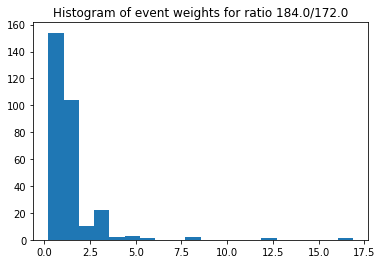

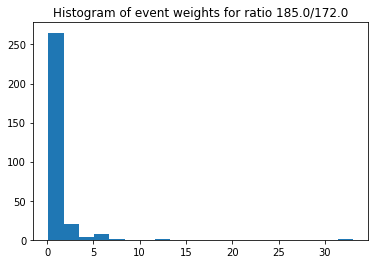

In [2]:
ratios = []
for event_weights in weights:
    ratios.append(event_weights/event_weights[expected_benchmark_idx])
ratios = np.array(ratios)

for idx, benchmark in enumerate(benchmarks):
    plt.hist(ratios[:,idx],bins=20)
    plt.title('Histogram of event weights for ratio {}/{}'.format(benchmarks[idx], benchmarks[expected_benchmark_idx]))
    plt.show()

In [3]:
log_sq_ratios = []
momemta_log_ratios = []
for ratio in ratios:
    log_sq_ratios.append(-2 * np.log(ratio))
    momemta_log_ratios.append(np.log(ratio))
log_sq_ratios = np.array(log_sq_ratios)
momemta_log_ratios = np.array(momemta_log_ratios)
print log_sq_ratios[0][0], log_sq_ratios[0][expected_benchmark_idx], log_sq_ratios[0][-1]

3.840540708892636 -0.0 0.07925176335931197


In [4]:
log_sq_ratio_sums = np.sum(log_sq_ratios, axis=0)
print log_sq_ratio_sums

[ 2.59423689e+02  2.36235743e+02  1.92226553e+02  1.71494844e+02
  1.46955382e+02  1.02073421e+02  7.10819515e+01  3.40526130e+01
  2.58919500e+01  3.25669138e+01  1.81707103e+01  1.28584581e+01
  0.00000000e+00 -2.20353117e+01 -1.66815453e+01 -4.52593595e+01
 -5.65798983e+01 -9.32287372e+00 -1.80655654e+01 -6.02884249e+00
 -4.46239983e+01 -3.13903066e+01 -6.34696410e+00  1.49358397e+01
  7.07327203e-02  6.76685698e+01]


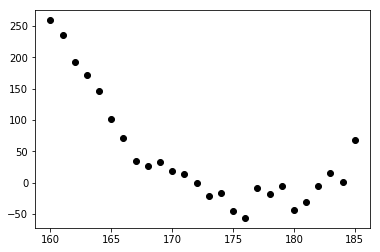

In [5]:
plt.plot(benchmarks, log_sq_ratio_sums, 'o', color='black');

#### Load madminer model and extract event-level ratios

In [6]:
from madminer.ml import DoubleParameterizedRatioEstimator

In [7]:
forge = DoubleParameterizedRatioEstimator(n_hidden=(100, 100))
n_observables = 23
forge.load('/home/zbhatti/codebase/madminer/momemta/inputs/alice')
theta0 = np.vstack( (np.linspace(160.,185.,26), 1.5*np.ones(26)) ).T
theta1 = np.vstack( (172.*np.ones(26), 1.5*np.ones(26)) ).T
x = np.load('/home/zbhatti/codebase/madminer/momemta/inputs/x_test.npy')[:300,:]
log_ratios_T, _0, _1 = forge.evaluate_log_likelihood_ratio(x=x, theta0=theta0, theta1=theta1, test_all_combinations=True)
print theta0.shape, theta1.shape, x.shape, log_ratios_T.shape

(26, 2) (26, 2) (300, 23) (26, 300)


[-67.43999  -65.40513  -63.266468 -60.828415 -57.848774 -54.088383
 -49.351124 -43.516373 -36.55554  -28.535746 -19.61132  -10.007296
   0.        10.101863  19.9768    29.314352  37.84282   45.359035
  51.751564  57.010094  61.220684  64.54755   67.20776   69.44152
  71.482666  73.52969 ]


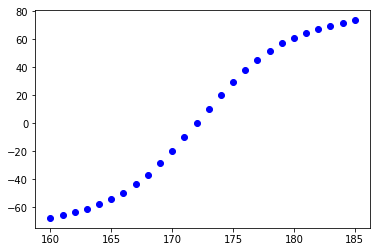

In [8]:
madminer_log_ratios = log_ratios_T.T
madminer_log_sq_ratios = np.sum(-2*madminer_log_ratios, axis=0)
print madminer_log_sq_ratios
plt.plot(benchmarks, madminer_log_sq_ratios, 'o', color='blue')


In [9]:
madminer_log_ratios.shape, momemta_log_ratios.shape

((300, 26), (300, 26))

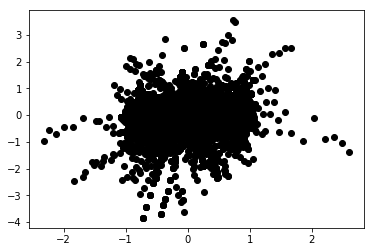

In [10]:
plt.plot(madminer_log_ratios, momemta_log_ratios, 'o', color='black');

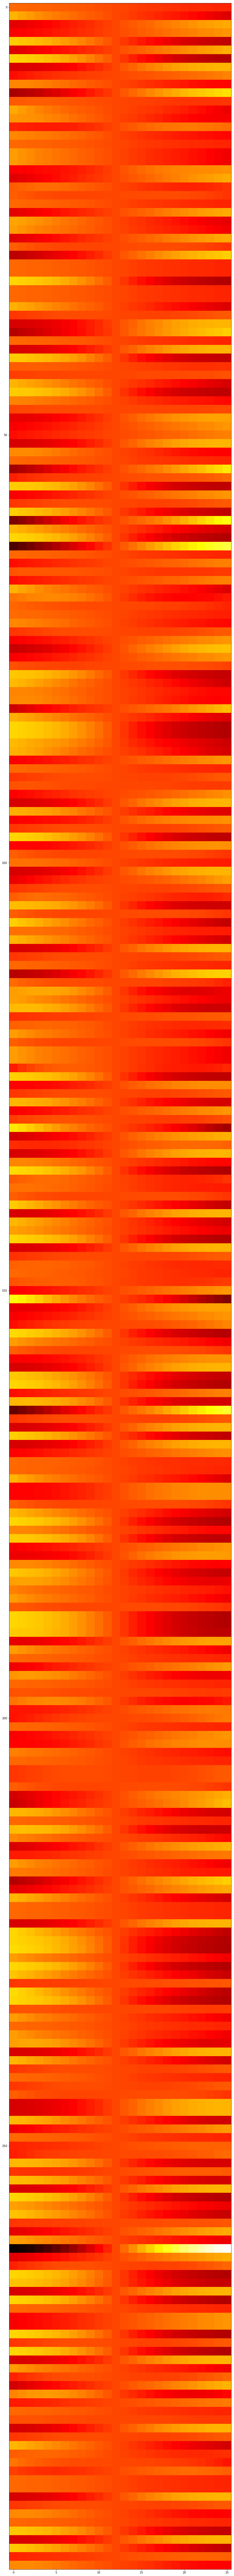

In [11]:
plt.figure(figsize=(40, 170))
plt.imshow(madminer_log_ratios, cmap='hot', interpolation='nearest')


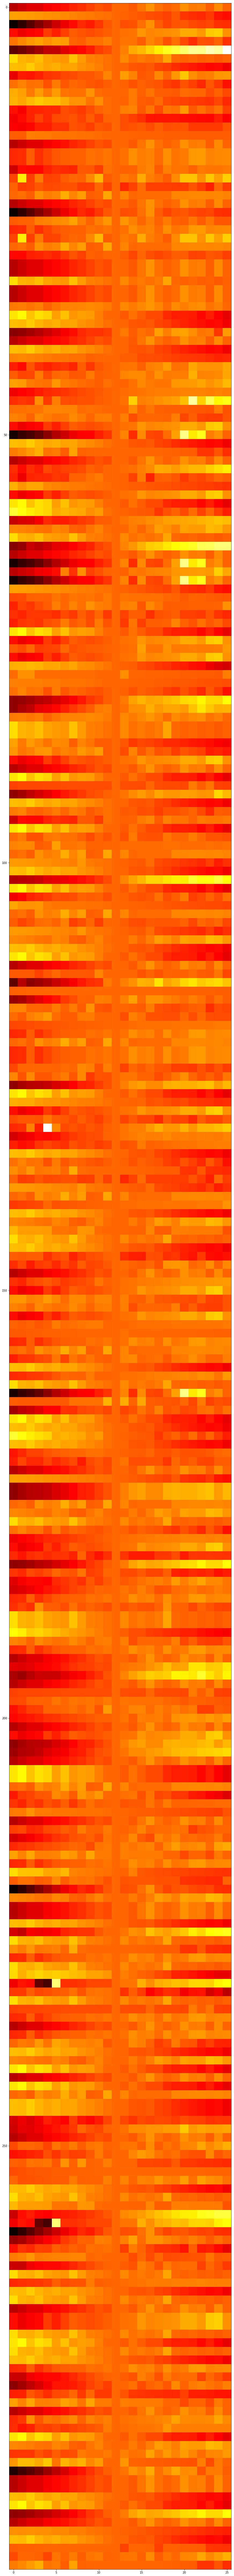

In [12]:
plt.figure(figsize=(40, 170))
plt.imshow(momemta_log_ratios, cmap='hot', interpolation='nearest')